<a href="https://colab.research.google.com/github/luoChengwen/machine_learning_test/blob/master/Excercise_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('/gdrive/My Drive/assignment/exercise/Data.csv')

In [4]:
data.head()

,POLICY_REF_DUMMY,PROPOSAL_SUBMISSION_DATE,FIRST_UW_DEC,LAST_UW_DEC,ISSUE_DATE,ST_DATE,POL_ST,QRY,PRODUCT_CATEGORY,PROD_TYPE,PRODUCT_CODE,PRODUCT_NAME_L1,PRODUCT_NAME,BASIC_COVER_TYPE,COVER_CODE,COVER_TYPE,COVER_CAT,INSURED_AMT,PREMIUM,COVER_TERM,PAY_TERM,PAY_METHOD,PAY_MODE,PAY_AGE,COVER_AGE,INSURED_ID,BUYER_ID,RELATIONSHIP,RELATIONSHIP_BIN,ENTRY_AGE,GENDER,OCCUPATION,OCCUPATION_CLASS,SMOKER_STATUS,SMK_NO_CIG,HEIGHT,WEIGHT,MEDICAL_FLAG,NATIONALITY_DUMMY,REGION_DUMMY,OWNER_AGE,OWNER_GENDER,OWNER_OCCUPATION,OWNER_OCCUPATION_CLASS,CLASS_ORDER,AGENCY,CHANNEL,SERV_BRANCH_DUMMY,AGENT_CD_DUMMY
0,POLID_6930,NaN,Issued Policy (UND),OK TO ISSUE,03/19/2013,04/23/2014,SURRENDERED,UL_BASIC,Investment,UL,"2,161",Optimal Power,OPTIMAL POWER PESO,UNIT LINK,"2,161",Basic,NaN,"125,000.00","100,000.00",1.0,1.0,Single Pay,Cash/Check,35.0,35.0,PART_ID_10751,NaN,SELF,SELF,34,F,PLANNER,NaN,NaN,NaN,"5,1,FI",115 P,NaN,NATIONALITY_ID_1,REGION_11,34.0,F,PLANNER,NaN,0,NaN,NaN,SERV_BRANCH_398,NaN
1,POLID_3215,06/30/2011,Tagged as OK to issue,OK TO ISSUE,06/15/2011,06/08/2011,Inforce,TRAD_BASIC,Retirement,NUL,"2,198",Velocity,5-Pay Velocity Express (Participating),ANTICIPATED ENDOWMENT,"2,198",Basic,NaN,"500,000.00","161,515.00",5.0,5.0,Annual,Cash/Check,58.0,58.0,PART_ID_8104,NaN,SELF,SELF,53,F,FAMILY MEDICINE - DOCTOR,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",NaN,NaN,"5,2,FI",54 K,NaN,NATIONALITY_ID_1,REGION_2,53.0,F,FAMILY MEDICINE - DOCTOR,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",4,NaN,NaN,SERV_BRANCH_452,AGENT_CD_58
2,POLID_7224,NaN,Issued Policy (UND),OK TO ISSUE,06/18/2013,06/17/2013,INFORCE,UL_BASIC,Investment,UL,"2,163",Optimum Gold,OPTIMUM GOLD,UNIT LINK,"2,163",Basic,NaN,"562,500.00","450,000.00",1.0,1.0,Single Pay,Cash/Check,60.0,60.0,PART_ID_15437,NaN,SELF,SELF,59,F,HOUSEWIFE,NaN,NaN,NaN,"5,2,FI",140 P,NaN,NATIONALITY_ID_1,REGION_1,59.0,F,HOUSEWIFE,NaN,0,NaN,NaN,SERV_BRANCH_564,AGENT_CD_42
3,POLID_54,NaN,Tagged as OK to issue,OK TO ISSUE,12/14/2010,12/13/2010,Inforce,TRAD_BASIC,Retirement,NUL,"2,127",Velocity,5-Pay Velocity (Participating),ANTICIPATED ENDOWMENT,"2,127",Basic,NaN,"100,000.00","26,745.00",5.0,5.0,Annual,Cash/Check,24.0,24.0,PART_ID_5553,PART_ID_578,DAUGHTER,CHILDREN,19,F,STUDENT,STUDENT,NaN,NaN,"5,0,FI",100 P,NaN,NATIONALITY_ID_1,REGION_10,50.0,F,BANK MANAGER,BANK,10,NaN,NaN,SERV_BRANCH_600,AGENT_CD_41
4,POLID_54,NaN,Tagged as OK to issue,OK TO ISSUE,12/14/2010,12/13/2010,Inforce,TRAD_RIDER,Protection,NUL,"1,476",NaN,Accidental Death and Dismemberment Benefit Rider,ACC DEATH & DISMEMBERMENT,"1,476",Rider,NaN,"100,000.00",443,5.0,5.0,Annual,Cash/Check,24.0,24.0,PART_ID_5553,PART_ID_578,DAUGHTER,CHILDREN,19,F,STUDENT,STUDENT,NaN,NaN,"5,0,FI",100 P,NaN,NATIONALITY_ID_1,REGION_10,50.0,F,BANK MANAGER,BANK,10,NaN,NaN,SERV_BRANCH_600,AGENT_CD_41


In [5]:
data.describe()

,COVER_CAT,COVER_TERM,PAY_TERM,PAY_AGE,COVER_AGE,ENTRY_AGE,SMOKER_STATUS,SMK_NO_CIG,OWNER_AGE,CLASS_ORDER,AGENCY,CHANNEL
count,0.0,19790.000000,19790.000000,19790.000000,19790.000000,20752.000000,0.0,0.0,20728.000000,20752.000000,0.0,0.0
mean,NaN,6.227337,6.227337,37.218090,37.218090,30.918658,NaN,NaN,43.508684,2.841172,NaN,NaN
std,NaN,13.736690,13.736690,21.935179,21.935179,18.898141,NaN,NaN,12.469283,2.377980,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2.000000,0.000000,NaN,NaN
25%,NaN,1.000000,1.000000,18.000000,18.000000,13.000000,NaN,NaN,35.000000,2.000000,NaN,NaN
50%,NaN,3.000000,3.000000,38.000000,38.000000,32.000000,NaN,NaN,43.000000,2.000000,NaN,NaN
75%,NaN,5.000000,5.000000,53.000000,53.000000,46.000000,NaN,NaN,52.000000,3.000000,NaN,NaN
max,NaN,100.000000,100.000000,109.000000,109.000000,75.000000,NaN,NaN,93.000000,10.000000,NaN,NaN


In [0]:
data.drop(columns=['POLICY_REF_DUMMY', 'PROPOSAL_SUBMISSION_DATE', 'FIRST_UW_DEC',
       'LAST_UW_DEC', 'ISSUE_DATE', 'ST_DATE', 'POL_ST','PAY_TERM',
       'PAY_METHOD', 'PAY_MODE', 'PAY_AGE', 'COVER_AGE', 'AGENT_CD_DUMMY'], inplace=True)

In [7]:
data.isnull().sum() / len(data) * 100

QRY                         0.000000
PRODUCT_CATEGORY            0.000000
PROD_TYPE                   0.000000
PRODUCT_CODE                0.000000
PRODUCT_NAME_L1            38.285466
PRODUCT_NAME                0.000000
BASIC_COVER_TYPE            0.000000
COVER_CODE                  0.000000
COVER_TYPE                  0.000000
COVER_CAT                 100.000000
INSURED_AMT                 2.134734
PREMIUM                     5.358520
COVER_TERM                  4.635698
INSURED_ID                  0.000000
BUYER_ID                   60.798959
RELATIONSHIP                0.000000
RELATIONSHIP_BIN            0.000000
ENTRY_AGE                   0.000000
GENDER                      0.000000
OCCUPATION                  8.196800
OCCUPATION_CLASS            4.524865
SMOKER_STATUS             100.000000
SMK_NO_CIG                100.000000
HEIGHT                      4.886276
WEIGHT                      2.741904
MEDICAL_FLAG               97.956823
NATIONALITY_DUMMY           0.337317
R

In [0]:
# remove 100% empty cell
data_2 = data[data.isnull().sum()[data.isnull().sum() / len(data) < .7].index]

In [9]:
# double check whether na values in buyer_id only represents for buying for themselves, should be 0.
sum(data_2.INSURED_ID == data_2.BUYER_ID)

0

In [10]:
print(len(set(data_2.PRODUCT_CATEGORY.dropna())) )# number of insurance types
set(data_2.PRODUCT_CATEGORY.dropna())

5


{'Health', 'Investment', 'Protection', 'Retirement', 'Savings'}

In [11]:
data_2['BUYER_ID'] = pd.Series([data_2.loc[i,'BUYER_ID'] if isinstance(data_2.loc[i,'BUYER_ID'] ,str) else data_2.loc[i,'INSURED_ID'] for i in np.arange(len(data_2))])
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
gender_dict ={'F': 0, 'M':1, }
data_2['OWNER_GENDER'] = data_2['OWNER_GENDER'].map(gender_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


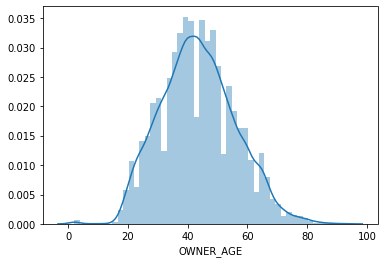

In [13]:
sns.distplot(data_2['OWNER_AGE'].dropna())

In [14]:
data_2['OWNER_AGE2'] = pd.qcut(data_2['OWNER_AGE'], 6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# from scipy import stats
# data_2[['OWNER_OCCUPATION', 'OWNER_OCCUPATION_CLASS']].groupby('OWNER_OCCUPATION_CLASS').apply(stats.mode)

In [16]:
data_2.groupby(['OWNER_GENDER','OWNER_AGE2']).count()[['INSURED_ID']]


INSURED_ID
OWNER_GENDER OWNER_AGE2               
0.0          (1.999, 31.0]        2201
             (31.0, 38.0]         2500
             (38.0, 43.0]         2204
             (43.0, 49.0]         2532
             (49.0, 56.0]         2015
             (56.0, 93.0]         2111
1.0          (1.999, 31.0]        1467
             (31.0, 38.0]         1228
             (38.0, 43.0]         1115
             (43.0, 49.0]         1193
             (49.0, 56.0]         1053
             (56.0, 93.0]         1106

Text(0.5, 1.0, 'Age group & gender in buying insurance')

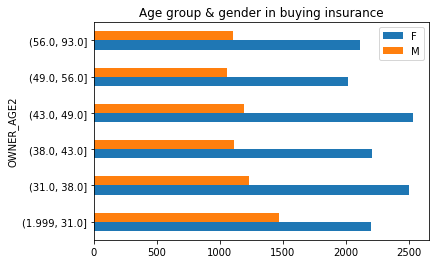

In [17]:
data_2.groupby(['OWNER_GENDER','OWNER_AGE2']).count()[['INSURED_ID']].unstack(0).plot.barh()
plt.legend(['F','M'])
plt.title('Age group & gender in buying insurance')

Females are more likly to buy insurance than males on average

In [0]:
buy_for_others = pd.DataFrame()
for i in range(len(data_2)):
    if data_2.loc[i,'INSURED_ID'] != data_2.loc[i,'BUYER_ID']:
        buy_for_others = buy_for_others.append(data_2.loc[i,:], ignore_index=True)

Text(0.5, 1.0, 'Age group & gender in buying insurance for others')

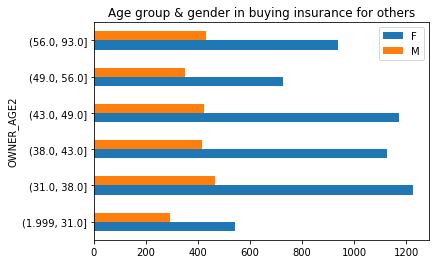

In [19]:
buy_for_others.groupby(['OWNER_GENDER','OWNER_AGE2']).count()[['INSURED_ID']].unstack(0).plot.barh()
plt.legend(['F','M'])
plt.title('Age group & gender in buying insurance for others')

Most people buy insurance for themselves.

Q1, Feamles are more likely to buy insurance for others

Text(0.5, 1.0, 'relationship & gender in buying insurance for others')

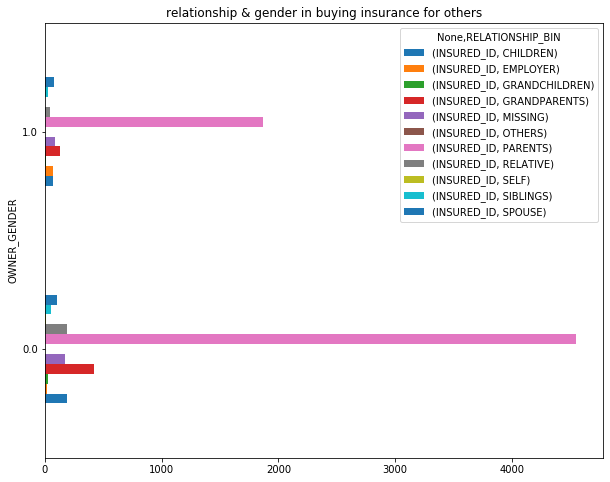

In [20]:
buy_for_others.groupby(['RELATIONSHIP_BIN','OWNER_GENDER']).count()[['INSURED_ID']].unstack(0).plot.barh(figsize=(10,8))
# plt.legend(['F','M'])
plt.title('relationship & gender in buying insurance for others')

In [0]:
import warnings
warnings.simplefilter('ignore')

data_2['OWNER_AGE'] = data_2['OWNER_AGE'].fillna(data_2.OWNER_AGE.mode()[0])
data_2['OWNER_GENDER'] = data_2['OWNER_GENDER'].fillna(0)

In [22]:
data_2.isnull().sum()

QRY                          0
PRODUCT_CATEGORY             0
PROD_TYPE                    0
PRODUCT_CODE                 0
PRODUCT_NAME_L1           7945
PRODUCT_NAME                 0
BASIC_COVER_TYPE             0
COVER_CODE                   0
COVER_TYPE                   0
INSURED_AMT                443
PREMIUM                   1112
COVER_TERM                 962
INSURED_ID                   0
BUYER_ID                     0
RELATIONSHIP                 0
RELATIONSHIP_BIN             0
ENTRY_AGE                    0
GENDER                       0
OCCUPATION                1701
OCCUPATION_CLASS           939
HEIGHT                    1014
WEIGHT                     569
NATIONALITY_DUMMY           70
REGION_DUMMY               156
OWNER_AGE                    0
OWNER_GENDER                 0
OWNER_OCCUPATION           316
OWNER_OCCUPATION_CLASS    1016
CLASS_ORDER                  0
SERV_BRANCH_DUMMY            0
OWNER_AGE2                  24
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_2.OWNER_OCCUPATION = data_2.OWNER_OCCUPATION.fillna('Missing')
le.fit(data_2.OWNER_OCCUPATION)

LabelEncoder()

In [0]:
data_2['OWNER_OCCUPATION'] = le.transform(data_2.OWNER_OCCUPATION) 

In [0]:
# further columns to delete
data_3 = data_2.drop(columns = ['PRODUCT_NAME','PRODUCT_NAME_L1', 'BASIC_COVER_TYPE', 'COVER_CODE','OWNER_OCCUPATION_CLASS', 'OCCUPATION', 'OCCUPATION_CLASS', 'HEIGHT','WEIGHT','REGION_DUMMY','NATIONALITY_DUMMY'])

In [26]:
table = pd.pivot_table(data_3, values='PRODUCT_CATEGORY', index=['CLASS_ORDER'],
                    columns=['OWNER_GENDER'], aggfunc='count')
table

OWNER_GENDER,0.0,1.0
CLASS_ORDER,,
0,690,405
1,2616,554
2,6586,3643
3,864,808
4,962,283
5,75,441
6,623,441
7,177,134
8,33,45


In [27]:
top_basic = data_3[data_3['COVER_TYPE'] =='Basic'].PRODUCT_CODE.value_counts().head(30) # most purchased basic 'product code'
print(type(top_basic.index[0]))
top_basic

<class 'str'>


2,163    2233
2,161    1560
2,127     762
2,114     714
2,258     614
2,174     489
2,283     344
2,124     310
2,413     301
2,198     297
2,414     279
2,164     253
2,171     212
2,055     180
2,211     176
2,054     165
2,104     161
2,115     141
2,209     127
2,162     120
2,287     112
2,237     106
2,282     106
2,401     105
2,119     105
2,128      98
2,350      93
2,179      92
2,284      90
2,229      90
Name: PRODUCT_CODE, dtype: int64

##  segmenting customers based on most purchased basic product code



In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


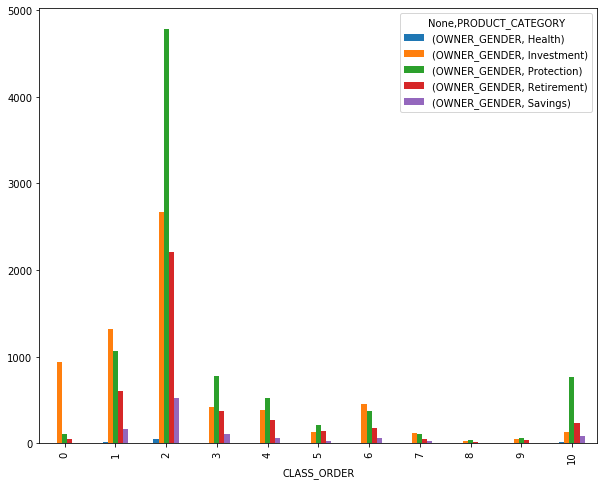

In [29]:
buyer_related = data_3[['BUYER_ID' ,'OWNER_AGE', 'OWNER_GENDER','CLASS_ORDER', 'PRODUCT_CATEGORY','PRODUCT_CODE','OWNER_OCCUPATION']]
buyer_related.groupby(['PRODUCT_CATEGORY','CLASS_ORDER']).count()[['OWNER_GENDER']].unstack(0).plot.bar(figsize=(10,8))

In [30]:
category_product_code = buyer_related[['PRODUCT_CATEGORY','PRODUCT_CODE']]
category_product_code.head()

,PRODUCT_CATEGORY,PRODUCT_CODE
0,Investment,"2,161"
1,Retirement,"2,198"
2,Investment,"2,163"
3,Retirement,"2,127"
4,Protection,"1,476"


In [31]:
category_count = category_product_code.groupby('PRODUCT_CATEGORY').nunique()
category_count 

,PRODUCT_CATEGORY,PRODUCT_CODE
PRODUCT_CATEGORY,,
Health,1,25
Investment,1,57
Protection,1,195
Retirement,1,55
Savings,1,55


In [0]:
basic_product_purchase = pd.DataFrame()
for i in range(len(buyer_related)):
    if buyer_related.loc[i,'PRODUCT_CODE'] in top_basic.index:
        basic_product_purchase = basic_product_purchase.append(buyer_related.iloc[i,:], ignore_index=True)

In [33]:
print(len(basic_product_purchase))
print(len(buyer_related))
basic_product_purchase.head()

10435
20752


,BUYER_ID,CLASS_ORDER,OWNER_AGE,OWNER_GENDER,OWNER_OCCUPATION,PRODUCT_CATEGORY,PRODUCT_CODE
0,PART_ID_10751,0.0,34.0,0.0,2588.0,Investment,"2,161"
1,PART_ID_8104,4.0,53.0,0.0,1506.0,Retirement,"2,198"
2,PART_ID_15437,0.0,59.0,0.0,1807.0,Investment,"2,163"
3,PART_ID_578,10.0,50.0,0.0,299.0,Retirement,"2,127"
4,PART_ID_10642,0.0,60.0,1.0,2895.0,Investment,"2,163"


In [0]:
buyers_X = basic_product_purchase.drop(columns=['PRODUCT_CATEGORY', 'PRODUCT_CODE','BUYER_ID'])

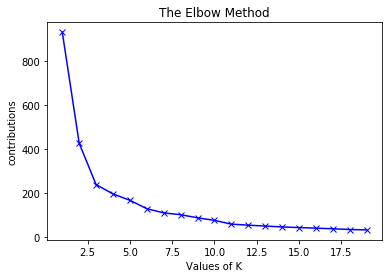

In [35]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(buyers_X) 
    kmeanModel.fit(buyers_X)     
      
    distortions.append(sum(np.min(cdist(buyers_X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / buyers_X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(buyers_X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / buyers_X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('contributions') 
plt.title('The Elbow Method') 
plt.show() 

#### elbow method shows 5 groups might be a good start.

In [0]:
kmeanModel = KMeans(n_clusters=6).fit(buyers_X)  
to_be_predicted = buyer_related.drop(columns=['PRODUCT_CATEGORY', 'PRODUCT_CODE','BUYER_ID'])
to_be_predicted = to_be_predicted[buyers_X.columns]
segment_pred = kmeanModel.predict(to_be_predicted)

In [0]:
buyer_related_with_seg = buyer_related.assign(segmentation=segment_pred)

In [38]:
buyer_related_with_seg.head()

,BUYER_ID,OWNER_AGE,OWNER_GENDER,CLASS_ORDER,PRODUCT_CATEGORY,PRODUCT_CODE,OWNER_OCCUPATION,segmentation
0,PART_ID_10751,34.0,0.0,0,Investment,"2,161",2588,5
1,PART_ID_8104,53.0,0.0,4,Retirement,"2,198",1506,2
2,PART_ID_15437,59.0,0.0,0,Investment,"2,163",1807,2
3,PART_ID_578,50.0,0.0,10,Retirement,"2,127",299,1
4,PART_ID_578,50.0,0.0,10,Protection,"1,476",299,1


In [0]:
group_seg_product = buyer_related_with_seg.groupby(['segmentation','PRODUCT_CATEGORY']).nunique().drop(columns=['segmentation','PRODUCT_CATEGORY']).reset_index()
rec_order = group_seg_product.sort_values(['segmentation','BUYER_ID'],ascending=False).groupby('segmentation').head(len(group_seg_product))

In [40]:
print(np.resize(np.arange(5),5*6))
rec_order.head()

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


,segmentation,PRODUCT_CATEGORY,BUYER_ID,OWNER_AGE,OWNER_GENDER,CLASS_ORDER,PRODUCT_CODE,OWNER_OCCUPATION
26,5,Investment,813,66,2,11,42,324
27,5,Protection,707,56,2,11,101,297
28,5,Retirement,511,52,2,10,39,226
29,5,Savings,115,43,2,9,26,69
25,5,Health,6,6,1,3,8,5


In [0]:
rec_order = rec_order.assign(recommendation_order = np.resize(np.arange(5),5*6))

In [0]:
rec_order.reset_index(drop=True, inplace=True)

In [43]:
rec_order

,segmentation,PRODUCT_CATEGORY,BUYER_ID,OWNER_AGE,OWNER_GENDER,CLASS_ORDER,PRODUCT_CODE,OWNER_OCCUPATION,recommendation_order
0,5,Investment,813,66,2,11,42,324,0
1,5,Protection,707,56,2,11,101,297,1
2,5,Retirement,511,52,2,10,39,226,2
3,5,Savings,115,43,2,9,26,69,3
4,5,Health,6,6,1,3,8,5,4
5,4,Investment,686,56,2,11,39,252,0
6,4,Protection,680,53,2,11,109,300,1
7,4,Retirement,523,52,2,11,42,246,2
8,4,Savings,134,41,2,10,33,76,3
9,4,Health,6,6,2,4,6,5,4


In [44]:
buyer_related_with_seg.head()

,BUYER_ID,OWNER_AGE,OWNER_GENDER,CLASS_ORDER,PRODUCT_CATEGORY,PRODUCT_CODE,OWNER_OCCUPATION,segmentation
0,PART_ID_10751,34.0,0.0,0,Investment,"2,161",2588,5
1,PART_ID_8104,53.0,0.0,4,Retirement,"2,198",1506,2
2,PART_ID_15437,59.0,0.0,0,Investment,"2,163",1807,2
3,PART_ID_578,50.0,0.0,10,Retirement,"2,127",299,1
4,PART_ID_578,50.0,0.0,10,Protection,"1,476",299,1


In [0]:
unique_ID_purchase = pd.DataFrame()
individual_purchase = pd.DataFrame(buyer_related_with_seg.groupby('BUYER_ID')['PRODUCT_CATEGORY'].unique())
individual_seg = pd.DataFrame(buyer_related_with_seg.groupby('BUYER_ID')['segmentation'].unique())
individual_purchase = individual_purchase.merge(individual_seg, left_index= True, right_index= True, how='inner').reset_index()

In [53]:
individual_purchase.tail(10)

,BUYER_ID,PRODUCT_CATEGORY,segmentation
11687,PART_ID_9982,[Protection],[4]
11688,PART_ID_9983,[Protection],[5]
11689,PART_ID_9986,[Investment],[1]
11690,PART_ID_999,[Retirement],[1]
11691,PART_ID_9990,[Investment],[1]
11692,PART_ID_9991,[Investment],[5]
11693,PART_ID_9992,[Investment],[1]
11694,PART_ID_9993,[Investment],[1]
11695,PART_ID_9995,[Investment],[1]
11696,PART_ID_9997,[Investment],[2]


In [0]:
next_recommend = []
for i in range(len(individual_purchase)):
    customer_seg = individual_purchase.loc[i,'segmentation'][0]   
    seg_recommend = rec_order[rec_order['segmentation'] == customer_seg][['PRODUCT_CATEGORY','recommendation_order']].reset_index(drop=True)
    recommend_list = list(seg_recommend.PRODUCT_CATEGORY)
    product_bought = individual_purchase.loc[i,'PRODUCT_CATEGORY']
    for j in range(len(recommend_list)):
        if recommend_list[j] not in product_bought:   
            next_recommend.append([individual_purchase.loc[i,'BUYER_ID'],recommend_list[j]])
            break
        else:
            continue


In [0]:
pd.DataFrame(next_recommend,columns=['BUYER_ID','recommendation']).to_csv('/gdrive/My Drive/assignment/Allianz_exercise/Recommendation.csv') 

In [50]:
pd.DataFrame(next_recommend,columns=['BUYER_ID','recommendation']).head()

,BUYER_ID,recommendation
0,PART_ID_10,Investment
1,PART_ID_100,Retirement
2,PART_ID_1000,Retirement
3,PART_ID_10000,Protection
4,PART_ID_10001,Protection
